$$\require{mhchem}$$       

# Transient CSTR (2017 HW10)

Consider a transient CSTR with the following kinetics:
\begin{align*}
\ce{A ->[k] B}
\end{align*}
There is an inlet feed at temperature $T_0$, with a concentration $C_{A,0}$.
The various parameters are

| Parameter        | Value  $\quad\quad\quad$          | Units    |
|----------------|------------------|----------|
| $T_0$        | 298              | K        |
| $T_m$        | 298              | K        |
| $\hat{C}_p$    | 4.0              | kJ/kg K  |
| $C_{A,0}$       | 2.0              | kmol/m$^3$ |
| $k_m \: (T_m)$     | 0.004            | 1/min    |
| E/R            | $1.5 \times 10^4$ | K        |
| $\rho$       | $10^3$           | kg/m$^3$   |
| $\Delta H_R$ | $-2.2 \times 10^5$  | kJ/kmol  |
| U | 340 | kJ/min/K|

You can assume a reactor size of 1 m$^3$. The residence time ($\tau$) is 30 min, and from that the volumetric feed rate can be calculated ($\nu=V/\tau$). Heat is transferred to the reactor with a cooling jacket with heat transfer coefficient $U$ and a set point of $T_{set}=298$ K.

#### Calculate the concentration and temperature profile for the first 500 minutes. (4 points)

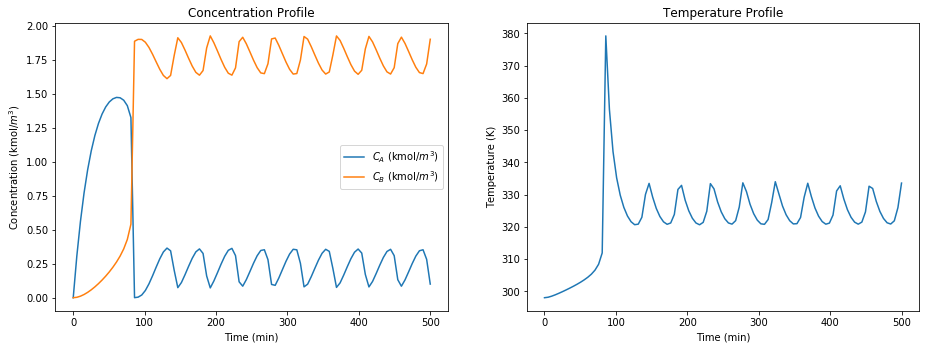

In [149]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

T0 =298        # K
Tm = 298       # K
Cp = 4.0       # kJ/kg K
CA0 = 2.0      # kmol/m3
km = 0.004     # 1/min  at Tm
Ebar = 1.5e4   # K
ρ = 10**3      # kg/m3
ΔHr = -2.2e5   # kJ/kmol
U = 340        # kJ/min/K
τ = 30         # min
V = 1          # m3
Tset = 298     # K
v0 = V / τ     # m3/min
Fa0 = CA0 * v0 # kmol/min
Fb0 = 0        # kmol/min

def CSTR(t, Y):
    Ca, Cb, T = Y
    k = km * np.exp(-Ebar * (1/T - 1/Tm))
    v = v0
    Fa = Ca * v
    Fb = Cb * v
    r = k * Ca
    
    # Material Balance
    dCadt = (Fa0 - Fa) / V - r
    dCbdt = (Fb0 - Fb) / V + r
    
    # Energy Balance
    NCp = Cp * V * ρ 
    dTdt = (v * ρ * Cp * (T0 - T) - ΔHr * r * V + U * (Tset - T)) / NCp
    
    return [dCadt, dCbdt, dTdt]

tspan = [0, 500]
teval = np.linspace(*tspan, 100)
Y0 = [0, 0, T0]

ans = solve_ivp(CSTR, tspan, Y0, t_eval = teval)

t = ans.t
Ca, Cb, T = ans.y

plt.subplot(1,2,1)
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=1.0)
plt.plot(t, Ca, label = '$C_A$ (kmol/$m^3$)')
plt.plot(t, Cb, label = '$C_B$ (kmol/$m^3$)')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (kmol/$m^3$)')
plt.title('Concentration Profile')
plt.legend()

plt.subplot(1,2,2)
plt.plot(t, T)
plt.title('Temperature Profile')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (K)');


#### Calculate a steady state solution for $C_{A,0}$ and temperature, T. (3 points)

In [150]:
import numpy as np
from scipy.optimize import fsolve

T0 =298        # K
Tm = 298       # K
Cp = 4.0       # kJ/kg K
CA0 = 2.0      # kmol/m3
km = 0.004     # 1/min  at Tm
Ebar = 1.5e4   # K
ρ = 10**3      # kg/m3
ΔHr = -2.2e5   # kJ/kmol
U = 340        # kJ/min/K
τ = 30         # min
V = 1          # m3
Tset = 298     # K
v0 = V / τ     # m3/min
Fa0 = CA0 * v0 # kmol/min
Fb0 = 0        # kmol/min

def SS_CSTR(Y):
    CA, T_ = Y
    k = km * np.exp(-Ebar * (1/T_ - 1/Tm))
    v = v0
    
    Fa = CA * v
    r = k * CA
    
    dCadt = (Fa0 - Fa) / V - r
    
    # Energy Balance
    NCp = Cp * V * ρ 
    dTdt = (v * ρ * Cp * (T0 - T_) - ΔHr * r * V + U * (Tset - T_)) / NCp
    
    return [dCadt, dTdt]

ans2 = fsolve(SS_CSTR, [0.2, 330])

print(f'At steady state, the concentration of A is {ans2[0]:1.3f} M and at \
temperature {ans2[1]:1.0f} K.')

At steady state, the concentration of A is 0.203 M and at temperature 326 K.


#### Assume that operation starts with the concentration of species A ($C_A$) and temperature (T) at the steady-state values you calculated above. Plot $C_A$ and T for the first 1000 minutes. (3 points)

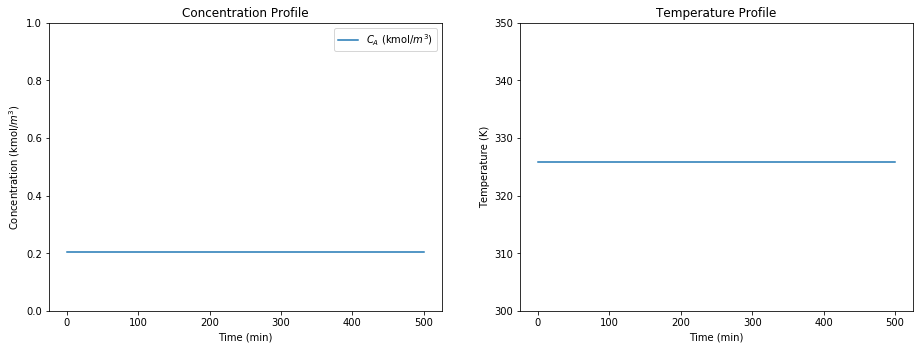

In [151]:
from scipy.integrate import odeint

def CSTR(Y, t):
    Ca, T = Y
    k = km * np.exp(-Ebar * (1/T - 1/Tm))
    v = v0
    Fa = Ca * v
    r = k * Ca
    
    # Material Balance
    dCadt = (Fa0 - Fa) / V - r
    
    # Energy Balance
    NCp = Cp * V * ρ 
    dTdt = (v * ρ * Cp * (T0 - T) - ΔHr * r * V + U * (Tset - T)) / NCp
    
    return [dCadt, dTdt]

tspan = [0, 1000]
teval = np.linspace(*tspan, 100)
Y0 = [ans2[0], ans2[1]]

ans = odeint(CSTR, Y0,teval)# t_eval = teval)
Ca = ans[:,0]
T = ans[:,1]

plt.subplot(1,2,1)
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=1.0)
plt.plot(t, Ca, label = '$C_A$ (kmol/$m^3$)')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (kmol/$m^3$)')
plt.ylim(0,1)
plt.title('Concentration Profile')
plt.legend()

plt.subplot(1,2,2)
plt.plot(t, T)
plt.title('Temperature Profile')
plt.ylim(300,350)
plt.xlabel('Time (min)')
plt.ylabel('Temperature (K)');


The difference in values of Concentration and Temperatures are negligible. Hence, it's an indicator of steady state.

#### Now plot $C_A$ and T again, but perturb\* the initial concentration of A by +0.001 M, and perturb\* the initial temperature by +0.001 K. Do you think that it would be feasible to maintain the process at the steady-state conditions you found above? Why or why not? (4 points)

*In this case, "perturb" means to simply change the value by a small amount

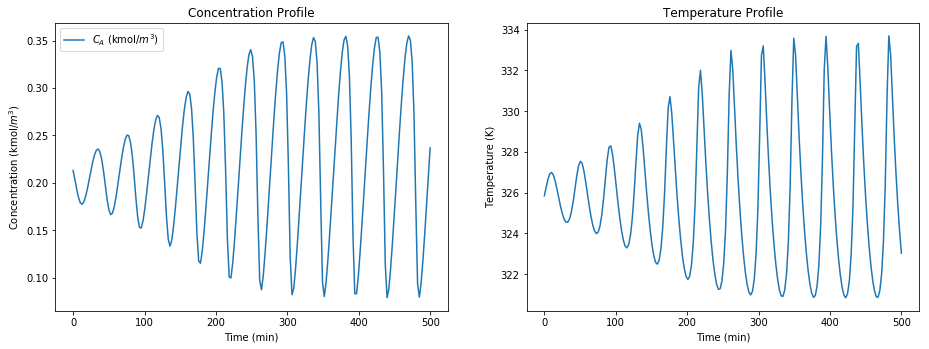

In [154]:
Ca2 = ans2[0] + 0.01
T2 = ans2[1] + 0.01

Y0 = [Ca2, T2]
teval = np.linspace(0, 500, 200)
ans = odeint(CSTR, Y0, teval)# t_eval = teval)
Ca = ans[:,0]
T = ans[:,1]

plt.subplot(1,2,1)
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=1.0)
plt.plot(teval, Ca, label = '$C_A$ (kmol/$m^3$)')
# plt.plot(t, Cb, label = '$C_B$ (kmol/$m^3$)')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (kmol/$m^3$)')
plt.title('Concentration Profile')
plt.legend()

plt.subplot(1,2,2)
plt.plot(teval, T)
plt.title('Temperature Profile')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (K)');


The slight perturbation introduced in concentration and temperature leads to perturbation in their profile. Thus, since the slight change introduced doesn't converge, it is practically difficult to maintain these conditions.

# Non-isothermal PFR (2017 HW11)

The gas-phase oxidation of o-xylene to phthalic anhydride is highly exothermic.  The reaction is carried out PFR bundles with molden salt circulating as the heat transfer fluid.  The o-xylene is mixed with air before entering the PFR. The reaction rate is limited by maintaining a low concentration of hydrocarbon in the feed. The mol fraction of o-xylene is less than 2%.  
\begin{align}
\text{o-xylene} \rightarrow \text{phthalic anhydride} 
\end{align}

Under these conditions, the large excess of oxygen leads to a pseudo-first-order rate expression:
\begin{align*}
r=k_m \exp \left[-E\left(\frac{1}{T}-\frac{1}{T_m}\right)\right] c_x 
\end{align*}
where $c_x$ is the o-xylene concetration.  The operating pressure is atmospheric.  

| Parameter   | Value                  | Units        |
|-------------|------------------------|--------------|
| $k_m$       | 2.0822                 | 1/s          |
| $T_A$       | 625                    | K            |
| $T_m$       | 625                    | K            |
| $P_f$       | 1.0                    | atm          |
| l           | 1.5                    | m            |
| R           | 0.0125                 | m            |
| $\hat{C}_p$ | 0.992                  | kJ/kg K      |
| U           | 0.373                  | kJ/m$^2$ s K |
| $y_{xf}$      | 0.019                  |              |
| E/R         | $1.3636\times 10^4$    | K            |
| $\Delta H_R$ | $-1.284 \times 10^6$   | kJ/kmol       |
| $Q\rho$     | $2.6371\times 10^{-3}$ | kg/s         |

$y_{xf}$ is the mol fraction of xylene in the feed. The rest is inert.  The specific heat is constant.  $T_m$ is the reference temperature. $T_a$ is the temperature of the coolant.  The average molecular weight of the inlet feed is 30.387 kg/kmol.

### Calculate the temperature and o-xylene composition profiles for inlet feed temperatures of 610 to 630 K.

In [156]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

km = 2.0822            # 1/s
TA = 625               # K
Tm = 625               # K
Pf = 1.0               # atm
l = 1.5                # m
R = 0.0125             # m
Ĉp = 0.992             # kJ/kg K
U = 0.373              # kJ/m^2-s-K
yxf = 0.019
Edash = 1.3636e4       # K
ΔHR = -1.284e6         # kJ/kmol
Qρ = 2.6371e-3         # kg/s
MWavg = 30.387         # kg/kmol
R_ = 0.08205           # L-atm / (mol-K)
Vol = np.pi * R**2 * l # m^3
CSA = 2 * np.pi * R * l    # m^2

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


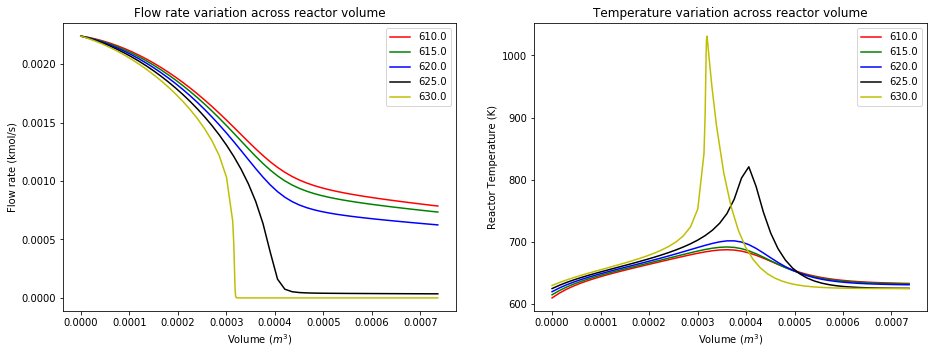

In [157]:
Cxfeed = yxf * Pf / (R_ * Tfeed) #kmol/m3
Ft = Qρ / MWavg
F0 = Qρ * yxf / MWavg  # kmol/s

def PFR(t, Y):
    Fx, T = Y 
    
    k = km * np.exp(-Edash * (1/T - 1/Tm))
    #v = Qρ * T/Tfeed    
    #Cx = Fx / v * MWavg 
    v = Ft * R_ * T / Pf   # m^3/s
    Cx = Fx / v   # * MWavg
    r = k * Cx  # kmol/m3-s
    
    dFxdV = -r
        
    dTdV = (-ΔHR * r + U * (CSA / Vol) * (TA - T)) / (Ĉp * Qρ)
    
    return [dFxdV, dTdV]

T0 = np.linspace(610, 630, 5)
colors = 'rgbkym'

for i, Tf in enumerate(T0):
    Tfeed = Tf
    Vspan = [0, Vol]
    Veval, h = np.linspace(*Vspan, retstep = True)
    Y0 = [F0, Tfeed]
    res = solve_ivp(PFR, Vspan, Y0,max_step = h)
    V = res.t
    F_x, T = res.y
    C_x = F_x / Vol

    plt.subplot(1,2,1)
    plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=1.0)
    plt.plot(V, C_x.T, color = colors[i], label = T0[i])
    plt.xlabel('Volume ($m^3$)')
    plt.ylabel('Flow rate (kmol/s)')
    plt.title('Flow rate variation across reactor volume')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(V, T.T, color = colors[i], label = T0[i])
    plt.xlabel('Volume ($m^3$)')
    plt.ylabel('Reactor Temperature (K)')
    plt.title('Temperature variation across reactor volume')
    plt.legend()

###  What is the maximum feed temperature that can be used that keeps the maximum reactor temperature below 700 K?

In [158]:
from scipy.optimize import fsolve

def obj(Tf):
    Tfeed = Tf
    Vspan = [0, Vol]
    Veval = np.linspace(*Vspan, 50)
    Y0 = [F0, Tfeed]
    res = solve_ivp(PFR, Vspan, Y0, t_eval = Veval)
    V = res.t
    F_x, T = res.y
    Tmax = max(T)
    
    return Tmax - 700

Tfmax = fsolve(obj, 620)
print(f'The maximum feed temperature to keeps the maximum reactor temperature below 700 K is {Tfmax[0]:1.2f} K.')

The maximum feed temperature to keeps the maximum reactor temperature below 700 K is 622.03 K.


/opt/conda/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


### We learn that the reaction is reversible.  Calculate the equilibrium constant as a function of temperature from 625 to 800 K on a y-log scale

The reference equilibrium constant at 625 K is $10^8$.  

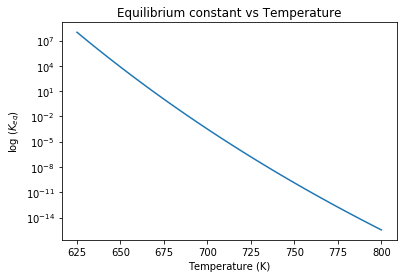

In [169]:
T = np.linspace(625, 800)
R_SI = 8.3145 # #kJ/kmol-K
K = Km * np.exp(-ΔHR/R_SI * (1/T - 1/Tm))
plt.semilogy(T, K)
plt.xlabel('Temperature (K)')
plt.ylabel('log ($K_{eq}$)')
plt.title('Equilibrium constant vs Temperature');

### Calculate the temperature and o-xylene composition profile for this reversible scenario for inlet feed temperatures of 610 to 630 K.  Explain what's happening.  

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


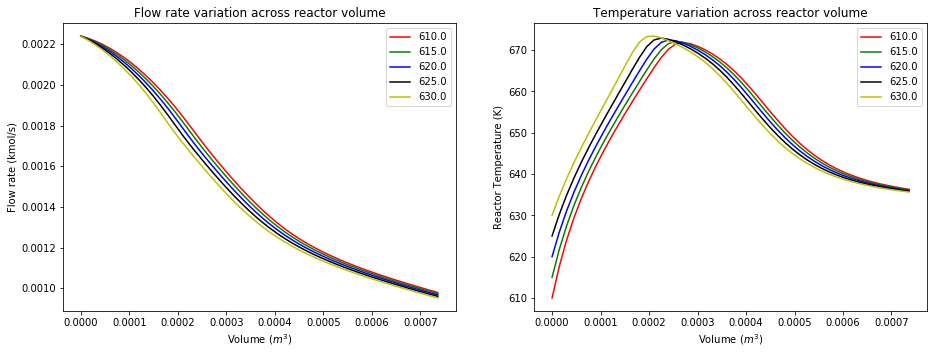

In [170]:
Km = 1e8
Cxfeed = yxf * Pf / (R_ * Tfeed) #kmol/m3
Ft = Qρ / MWavg
F0 = Qρ * yxf / MWavg  # kmol/s
F_I0 = Qρ * (1 - yxf) / MWavg  # kmol/s

def PFR2(t, Y):
    Fx, T = Y 
    Fpa = Ft - F_I0 - Fx
    k = km * np.exp(-Edash * (1/T - 1/Tm))
    K = Km * np.exp(-ΔHR / R_SI * (1/T - 1/Tm))
    
    v = Ft * R_ * T / Pf   # m^3/s
    Cx = Fx / v   
    Cpa = Fpa / v
    r = k * (Cx - Cpa/K)  # kmol/m3-s
    
    dFxdV = -r
        
    dTdV = (-ΔHR * r + U * (CSA / Vol) * (TA - T)) / (Ĉp * Qρ)
    
    return [dFxdV, dTdV]

T0 = np.linspace(610, 630, 5)

for i, Tf in enumerate(T0):
    Tfeed = Tf
    Vspan = [0, Vol]
    Veval, h = np.linspace(*Vspan, 50, retstep = True)
    Y0 = [F0, Tfeed]
    res = solve_ivp(PFR2, Vspan, Y0, max_step = h)
    # Cxfeed
    V = res.t
    F_x, T = res.y
    C_x = F_x / Vol

    plt.subplot(1,2,1)
    plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=1.0)
    plt.plot(V, C_x.T, color = colors[i], label = T0[i])
    plt.xlabel('Volume ($m^3$)')
    plt.ylabel('Flow rate (kmol/s)')
    plt.title('Flow rate variation across reactor volume')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(V, T.T, color = colors[i], label = T0[i])
    plt.xlabel('Volume ($m^3$)')
    plt.ylabel('Reactor Temperature (K)')
    plt.title('Temperature variation across reactor volume')
    plt.legend()

### What is the maximum conversion that you can get by adjusting the feed temperature and the cooling salt bath temperature ($T_A$)?

In [171]:
from scipy.optimize import minimize

def PFR2(Y, t, Ta):
    Fx, T = Y 
    Fpa = Ft - F_I0 - Fx
    k = km * np.exp(-Edash * (1/T - 1/Tm))
    K = Km * np.exp(-ΔHR / R_SI * (1/T - 1/Tm))
    
    v = Ft * R_ * T / Pf   # m^3/s
    Cx = Fx / v   
    Cpa = Fpa / v
    r = k * (Cx - Cpa/K)  # kmol/m3-s
    
    dFxdV = -r
        
    dTdV = (-ΔHR * r + U * (CSA / Vol) * (Ta - T)) / (Ĉp * Qρ)
    return [dFxdV, dTdV]

def MaxConv(Temp):
    Tfeed, Ta = Temp
    
    Veval, h = np.linspace(0, Vol, 50, retstep = True)
    Y0 = [F0, Tfeed]
    res = odeint(PFR2, Y0, Veval, args = (Ta,))#, max_step = h)
    
    F_x= res[:,0]
    T = res[:,1]
    #C_x = F_x / Vol
    x = (F0 - F_x[-1]) / F0
    return -x

ans = minimize(MaxConv, [630, 630]) 

The maximum conversion of 0.6581 is obtained by adjusting feed temperature = 656.18 K and cooling salt bath temperature (TA) = 637.95 K.


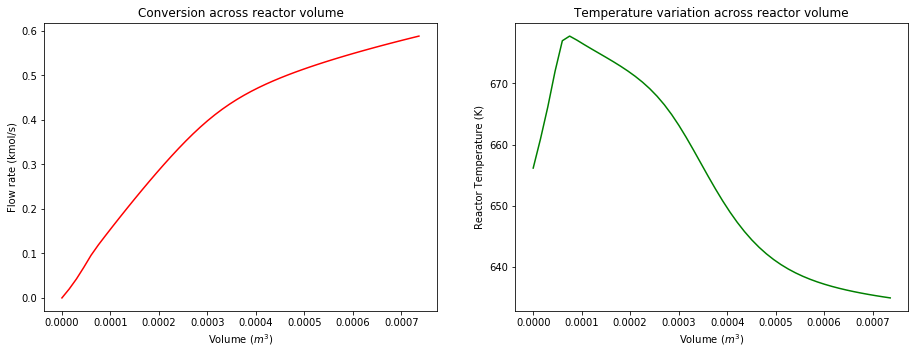

In [172]:
X_max = MaxConv(ans.x)
print(f'The maximum conversion of {-X_max:1.4f} is obtained by adjusting feed \
temperature = {ans.x[0]:1.2f} K and cooling salt bath temperature (TA) = \
{ans.x[1]:1.2f} K.')

Tfeed = ans.x[0]
Vspan = [0, Vol]
Veval, h = np.linspace(*Vspan, 50, retstep = True)
Y0 = [F0, Tfeed]
res = odeint(PFR2, Y0, Veval, args = (Ta,))

F_x= res[:,0]
T = res[:,1]
# C_x = F_x / Vol
X = (F0-F_x) / F0

plt.subplot(1,2,1)
plt.subplots_adjust(left=0.0, right=2.0, bottom=0.0, top=1.0)
plt.plot(Veval, X, color = 'r')
plt.xlabel('Volume ($m^3$)')
plt.ylabel('Flow rate (kmol/s)')
plt.title('Conversion across reactor volume')
# plt.legend()

plt.subplot(1,2,2)
plt.plot(Veval, T, color = 'g')
plt.xlabel('Volume ($m^3$)')
plt.ylabel('Reactor Temperature (K)')
plt.title('Temperature variation across reactor volume');
# plt.legend()
